In [44]:
# imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
# sns for heatmap
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [45]:
# lodaing data set 
# for now not doing the kaggle competition so Ill load the train csv and split that
df = pd.read_csv('dataset/train.csv')

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [46]:
# cool very nice and clean dataset
# lets get additional info
print(df.shape)
# what categories have nulls?
print(df.columns[df.isnull().any()].tolist())

(1460, 81)
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [47]:
df = df.drop(columns=['Id'])

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


/var/folders/_3/thd1dk4d0fv4zfhvd3c3xfph0000gn/T/ipykernel_10383/2929748020.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='plasma')


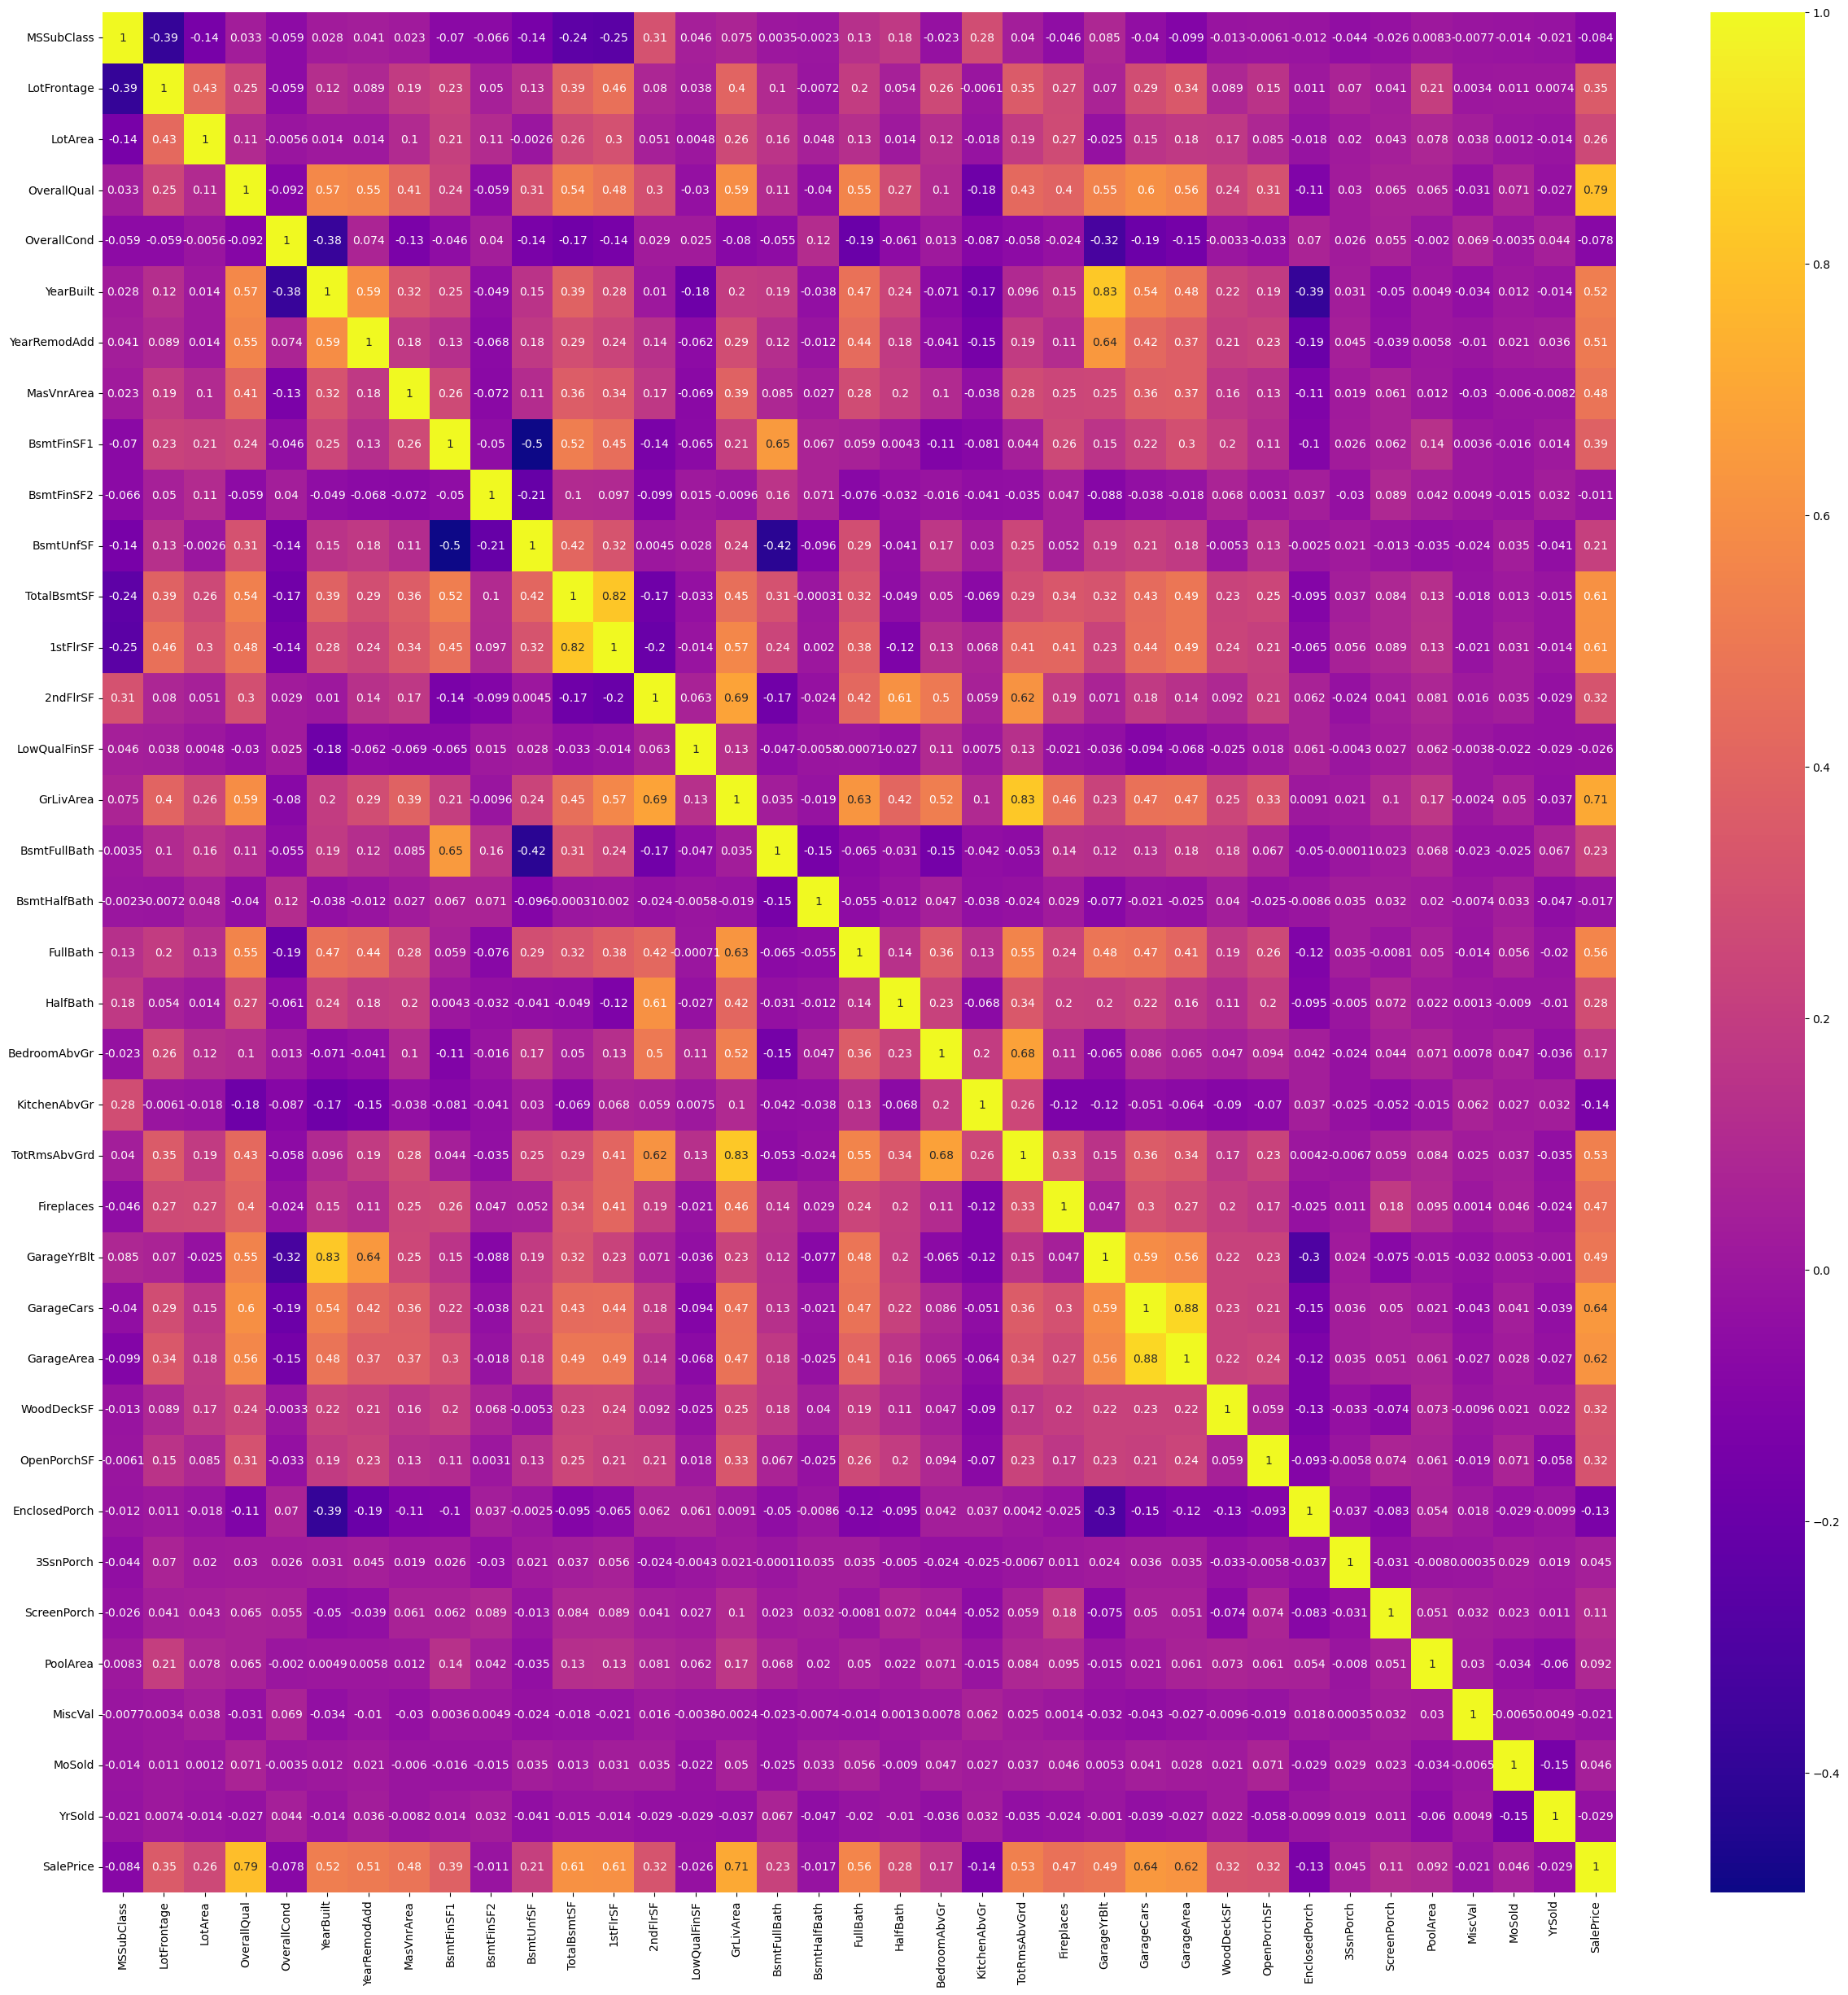

In [48]:
# ok so a few with missing values thats ok! lets see how important those are
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap='plasma')
plt.show()

In [49]:

# wow thats a lot of information lets use code to figure out the most important features
correlation = df.corr()
target = 'SalePrice'

corr_with_target = correlation[target].sort_values(ascending=False)
corr_to_target = corr_with_target.drop(target)
print(corr_to_target)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


/var/folders/_3/thd1dk4d0fv4zfhvd3c3xfph0000gn/T/ipykernel_10383/2768943749.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


In [50]:
# cool that makes it easy, to improve performace later on lets drop features that have less the moderate correlation to the target
# say less then .30
df = df.drop(columns=corr_to_target[abs(corr_to_target < 0.3)].index)
df.head()

,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,65.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,Y,0,61,NaN,NaN,NaN,WD,Normal,208500
1,RL,80.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,Y,298,0,NaN,NaN,NaN,WD,Normal,181500
2,RL,68.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,Y,0,42,NaN,NaN,NaN,WD,Normal,223500
3,RL,60.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,Y,0,35,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,84.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,Y,192,84,NaN,NaN,NaN,WD,Normal,250000


In [51]:
for col in df.columns:
    if df[col].dtype == np.int64 or df[col].dtype == np.float64:
        df[col] = df[col].fillna(df[col].mean())
    else:
        if df[col].isnull().any():
            df = df.drop(columns=[col])
        else:
            df = pd.get_dummies(df, columns=[col], drop_first=False)
print(df.shape)


(1460, 201)


In [52]:
df.columns[df.isnull().any()].tolist()
# cool, data cleaning is good to go!
df.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,...,0,0,0,1,0,0,0,0,1,0
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,...,0,0,0,1,0,0,0,0,1,0
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,...,0,0,0,1,0,0,0,0,1,0
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,...,0,0,0,1,1,0,0,0,0,0
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,...,0,0,0,1,0,0,0,0,1,0


MSE:  2459949453.6372705
RMSE:  49597.877511414445


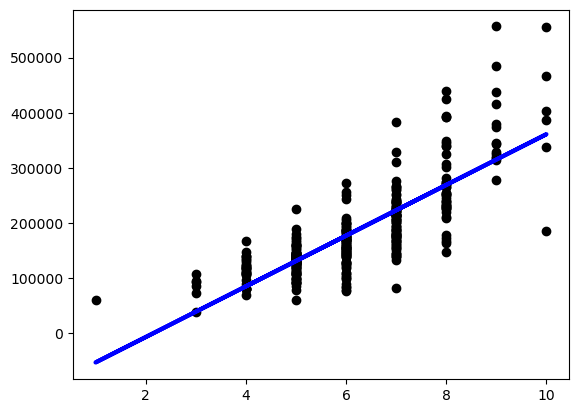

In [53]:
# EX 1
# lets do top feautre
X = df[['OverallQual']]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)


plt.show()

In [54]:
# wow thats a terrible performing model 
# what can we change? -> what if we add all features a split accordingly?
# lets do top 3 feautres 
X = df.drop(columns=[target])
y = df[target]

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42) #why 42? answer to life, the universe and everything. also its whats reccomended in my ML class

lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))




(1460, 200)
(1460,)
MSE:  980051934.97757
RMSE:  31305.781175009353


In [55]:
print(corr_to_target.index)

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea',
       'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea',
       'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal',
       'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch',
       'KitchenAbvGr'],
      dtype='object')


In [58]:
# Last ex
# Linear modeling seems to not be working 
# given that being more selective of features imporved scores lets do that
# what about polynomail regression and adding a bias column?
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
# as well as : https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
# as well as stuff used in my ML class
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

X = df[corr_to_target.index[:5]]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42) #why 42? answer to life, the universe and everything. also its whats reccomended in my ML class


deg = 3
poly = PolynomialFeatures(degree=deg, include_bias=True, order='C') 

X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

scaler = StandardScaler()
X_poly_train = scaler.fit_transform(X_poly_train)
X_poly_test = scaler.transform(X_poly_test)

lr = linear_model.SGDRegressor(max_iter=1000, learning_rate='constant', alpha=0.01)

lr.fit(X_poly_train, y_train)

y_pred = lr.predict(X_poly_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
# wow thats worse

MSE:  1.0369585121774155e+20
RMSE:  10183115987.640598
